In [37]:
# using Pkg
# Pkg.add("DifferentialEquations")
# Pkg.add("Plots")
using DifferentialEquations
using Plots


In [66]:
function derivative(y,p,t)
    🍵,r,ϕ,uₜ,uᵣ,uᵩ = y 
    m = 1
    dydτ = [uₜ,uᵣ,uᵩ, -2m/r^2 *(1 - 2m/r)^(-1) * uₜ * uᵣ , 
        (1 - 2m/r)*( -m/r^2 * uₜ^2 + 
            m/r^2* (1 - 2m/r)^(-2)* uᵣ^2 + r* uᵩ^2), -2/r * uᵩ * uᵣ ]
    return dydτ
end

derivative (generic function with 1 method)

In [67]:
#for massive object
R,C,ω,m = 10, (10sqrt(7))^(-1), -1, 1
τ = (0.0, 1000.0)
y = [0,R,0,sqrt( ( ( R^2* C^2 - ω)*R) /(R - 2m)), 0, C ]

prob = ODEProblem(derivative,y,τ)
sol = solve(prob,Tsit5(),reltol= 1e-10,
    abstol = 1e-10,saveat = (0:0.1:1000))

retcode: Success
Interpolation: 1st order linear
t: 10001-element Vector{Float64}:
    0.0
    0.1
    0.2
    0.3
    0.4
    0.5
    0.6
    0.7
    0.8
    0.9
    1.0
    1.1
    1.2
    ⋮
  998.9
  999.0
  999.1
  999.2
  999.3
  999.4
  999.5
  999.6
  999.7
  999.8
  999.9
 1000.0
u: 10001-element Vector{Vector{Float64}}:
 [0.0, 10.0, 0.0, 1.1952286093343936, 0.0, 0.03779644730092272]
 [0.11952286093343938, 10.0, 0.0037796447300922765, 1.1952286093343936, 0.0, 0.03779644730092272]
 [0.23904572186687895, 10.0, 0.007559289460184551, 1.1952286093343936, 0.0, 0.03779644730092272]
 [0.35856858280031817, 10.0, 0.011338934190276817, 1.1952286093343936, 0.0, 0.03779644730092272]
 [0.47809144373375817, 10.0, 0.015118578920369113, 1.1952286093343936, 0.0, 0.03779644730092272]
 [0.5976143046671969, 10.0, 0.018898223650461364, 1.1952286093343936, 0.0, 0.03779644730092272]
 [0.717137165600635, 10.0, 0.0226778683805536, 1.1952286093343936, 0.0, 0.03779644730092272]
 [0.836660026534073, 10.0, 

In [68]:
t = []
r = []
ϕ = []
uₜ = []
uᵣ = []
uᵩ = []

for i ∈ 1:length(sol)
    append!(t,sol[i][1])
    append!(r,sol[i][2])
    append!(ϕ,sol[i][3])
    append!(uₜ,sol[i][4])
    append!(uᵣ,sol[i][5])
    append!(uᵩ,sol[i][6])
end

♉ = range(0,1000,length = length(t))

0.0:0.1:1000.0

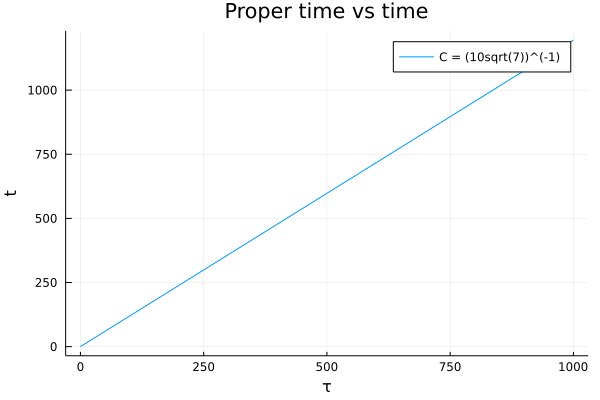

In [69]:
plot(♉,t,legend = true,label = 
    "C = (10sqrt(7))^(-1)",title ="Proper time vs time"
    ,xlabel = 'τ',ylabel = 't')

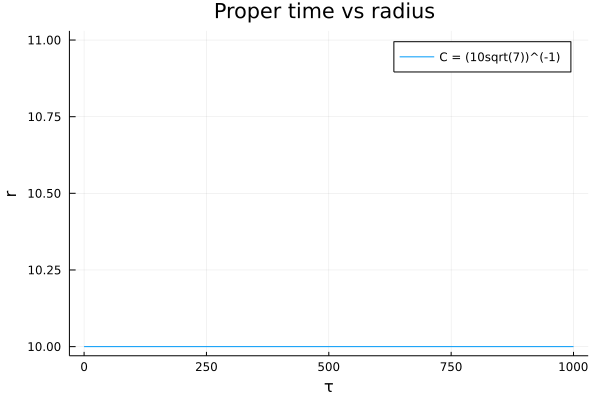

In [70]:
plot(♉,r,legend = true,label = "C = (10sqrt(7))^(-1)"
    ,title ="Proper time vs radius "
    ,xlabel = 'τ',ylabel = 'r')


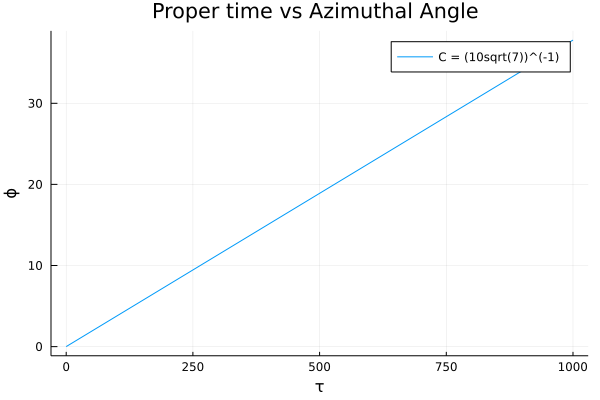

In [71]:
plot(♉,ϕ,legend = true,label = "C = (10sqrt(7))^(-1)",
    title ="Proper time vs Azimuthal Angle "
    ,xlabel = 'τ',ylabel = 'ϕ')

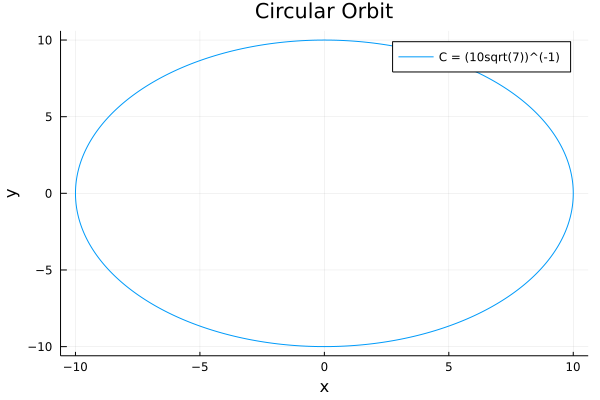

In [72]:
x = r .* cos.(ϕ)
y = r .* sin.(ϕ)


plot(x,y,legend = true,label = "C = (10sqrt(7))^(-1)",
    title = "Circular Orbit",xlabel = 'x',ylabel = 'y')

In [73]:
#for massive object
R,C,ω,m = 10, 1.1(10sqrt(7))^(-1), -1, 1
τ = (0.0, 1000.0)
y = [0,R,0,sqrt( ( ( R^2* C^2 - ω)*R) /(R - 2m)), 0, C ]

prob = ODEProblem(derivative,y,τ)
sol = solve(prob,Tsit5(),reltol= 1e-10,
    abstol = 1e-10,saveat = (0:0.1:1000))

retcode: Success
Interpolation: 1st order linear
t: 10001-element Vector{Float64}:
    0.0
    0.1
    0.2
    0.3
    0.4
    0.5
    0.6
    0.7
    0.8
    0.9
    1.0
    1.1
    1.2
    ⋮
  998.9
  999.0
  999.1
  999.2
  999.3
  999.4
  999.5
  999.6
  999.7
  999.8
  999.9
 1000.0
u: 10001-element Vector{Vector{Float64}}:
 [0.0, 10.0, 0.0, 1.21081436585937, 0.0, 0.041576092031015]
 [0.1210814259913331, 10.000010499990276, 0.004157606292781663, 1.2108140480213105, 0.00020999961100088557, 0.04157600472144011]
 [0.2421627884153182, 10.0000419998444, 0.008315195123729548, 1.2108130945156705, 0.00041999688802179424, 0.041575742795335956]
 [0.3632440237063944, 10.000094499212285, 0.012472749031557687, 1.2108115053680646, 0.0006299894971702734, 0.04157530626056385]
 [0.4843250683023687, 10.000167997510445, 0.016630250556013373, 1.2108092806211814, 0.0008399751047157668, 0.04157469513022535]
 [0.6054058586459012, 10.000262493922051, 0.020787682238336318, 1.2108064203347826, 0.0010499513

In [74]:
t = []
r = []
ϕ = []
uₜ = []
uᵣ = []
uᵩ = []

for i ∈ 1:length(sol)
    append!(t,sol[i][1])
    append!(r,sol[i][2])
    append!(ϕ,sol[i][3])
    append!(uₜ,sol[i][4])
    append!(uᵣ,sol[i][5])
    append!(uᵩ,sol[i][6])
end

♉ = range(0,1000,length = length(t))

0.0:0.1:1000.0

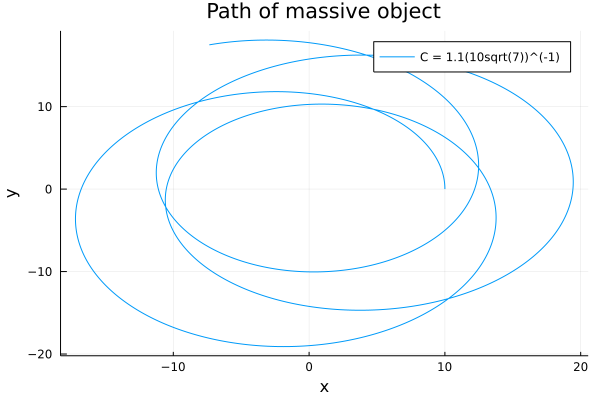

In [75]:
x = r .* cos.(ϕ)
y = r .* sin.(ϕ)


plot(x,y,legend = true,label = "C = 1.1(10sqrt(7))^(-1)",
    title = "Path of massive object",xlabel = 'x',ylabel = 'y')

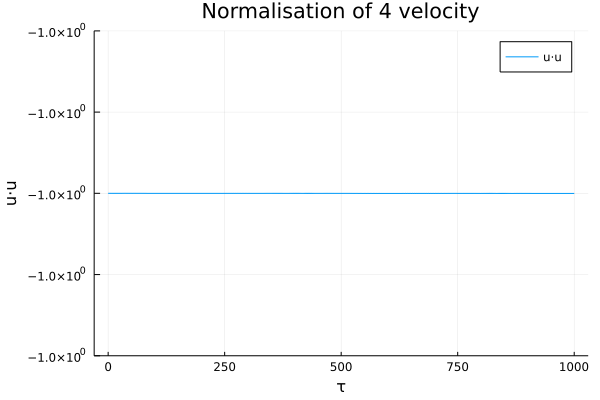

In [82]:
m = 1
nu = -(1 .-2m./r).*uₜ.^2 .+ (1 .- 2m./r).^(-1) .* uᵣ.^2 .+ r.^2 .*uᵩ.^2
plot(♉ ,nu, ylims =(-1-1e-8,-1 + 1e-8),title = "Normalisation of 4 velocity",
    xlabel = "τ", ylabel = "u⋅u",label = "u⋅u")